<a href="https://colab.research.google.com/github/hausaiyin/project-email-spam-classifier/blob/main/project_email_spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/spam_Emails_data.csv")

In [ ]:
df.sample(5)

,label,text
91191,Spam,that i get on to something else before i clear...
4257,Spam,mcuilla today absolutely charge sexxx ladies e...
72876,Ham,hello sharron sorry it has taken me so long to...
128370,Spam,investor alert escapenumber log jpg make escap...
168002,Spam,but aescapenumber aescapenumberthe war cries ...


In [ ]:
df.shape

(193852, 2)

## 1. Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193852 entries, 0 to 193851
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   193852 non-null  object
 1   text    193850 non-null  object
dtypes: object(2)
memory usage: 3.0+ MB


In [ ]:
df.sample(5)

,label,text
167805,Spam,all titles escapenumbern speclal on may escape...
93973,Ham,get your free download of msn explorer at htt...
24372,Ham,brat original message maggi mike sent friday o...
5688,Ham,hi i am using cpan to install modules from tim...
171151,Ham,louise almost important oprah last year mean w...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['label'] = encoder.fit_transform(df['label'])

In [ ]:
df.head()

,label,text
0,1,viiiiiiagraaaa\nonly for the ones that want to...
1,0,got ice thought look az original message ice o...
2,1,yo ur wom an ne eds an escapenumber in ch ma n...
3,1,start increasing your odds of success & live s...
4,0,author jra date escapenumber escapenumber esca...


In [ ]:
# missing values
df.isnull().sum()

,0
label,0
text,2


In [ ]:
df.dropna(subset=['text'], inplace=True)
df.isnull().sum()

,0
label,0
text,0


In [ ]:
# check for duplicate values
df.duplicated().sum()

0

In [ ]:
df.shape

(193850, 2)

## 2.EDA

In [ ]:
df.head()

,label,text
0,1,viiiiiiagraaaa\nonly for the ones that want to...
1,0,got ice thought look az original message ice o...
2,1,yo ur wom an ne eds an escapenumber in ch ma n...
3,1,start increasing your odds of success & live s...
4,0,author jra date escapenumber escapenumber esca...


In [ ]:
df['label'].value_counts()

,count
label,
0,102159
1,91691


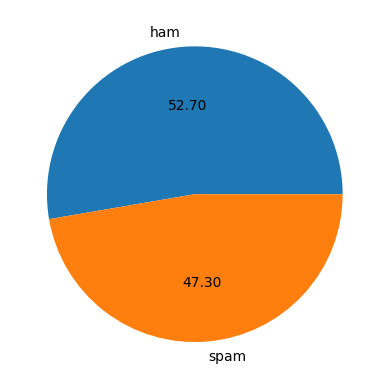

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
# Data is imbalanced

In [ ]:
import nltk

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
df['num_characters'] = df['text'].apply(len)

In [ ]:
df.head()

,label,text,num_characters
0,1,viiiiiiagraaaa\nonly for the ones that want to...,403
1,0,got ice thought look az original message ice o...,530
2,1,yo ur wom an ne eds an escapenumber in ch ma n...,215
3,1,start increasing your odds of success & live s...,345
4,0,author jra date escapenumber escapenumber esca...,3097


In [ ]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,label,text,num_characters,num_words
0,1,viiiiiiagraaaa\nonly for the ones that want to...,403,60
1,0,got ice thought look az original message ice o...,530,60
2,1,yo ur wom an ne eds an escapenumber in ch ma n...,215,48
3,1,start increasing your odds of success & live s...,345,69
4,0,author jra date escapenumber escapenumber esca...,3097,468


In [ ]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,label,text,num_characters,num_words,num_sentences
0,1,viiiiiiagraaaa\nonly for the ones that want to...,403,60,5
1,0,got ice thought look az original message ice o...,530,60,1
2,1,yo ur wom an ne eds an escapenumber in ch ma n...,215,48,1
3,1,start increasing your odds of success & live s...,345,69,8
4,0,author jra date escapenumber escapenumber esca...,3097,468,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1.938500e+05,1.938500e+05,193850.000000
mean,1.812779e+03,2.780992e+02,3.690508
std,2.659510e+04,3.672837e+03,23.062248
min,1.000000e+00,1.000000e+00,1.000000
25%,3.620000e+02,5.600000e+01,1.000000
50%,8.000000e+02,1.280000e+02,1.000000
75%,1.803000e+03,2.820000e+02,1.000000
max,1.151031e+07,1.585483e+06,3093.000000


In [ ]:
# ham
df[df['label'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1.021590e+05,1.021590e+05,102159.000000
mean,2.169723e+03,3.368394e+02,3.762331
std,3.656265e+04,5.048360e+03,26.428441
min,1.000000e+00,1.000000e+00,1.000000
25%,4.170000e+02,6.500000e+01,1.000000
50%,9.500000e+02,1.500000e+02,1.000000
75%,1.968000e+03,3.130000e+02,1.000000
max,1.151031e+07,1.585483e+06,2827.000000


In [ ]:
#spam
df[df['label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,91691.000000,91691.000000,91691.000000
mean,1415.085112,212.652747,3.610485
std,2367.969268,340.552611,18.607687
min,1.000000,1.000000,1.000000
25%,309.000000,48.000000,1.000000
50%,675.000000,107.000000,1.000000
75%,1570.000000,241.000000,1.000000
max,144087.000000,25444.000000,3093.000000


In [ ]:
import seaborn as sns

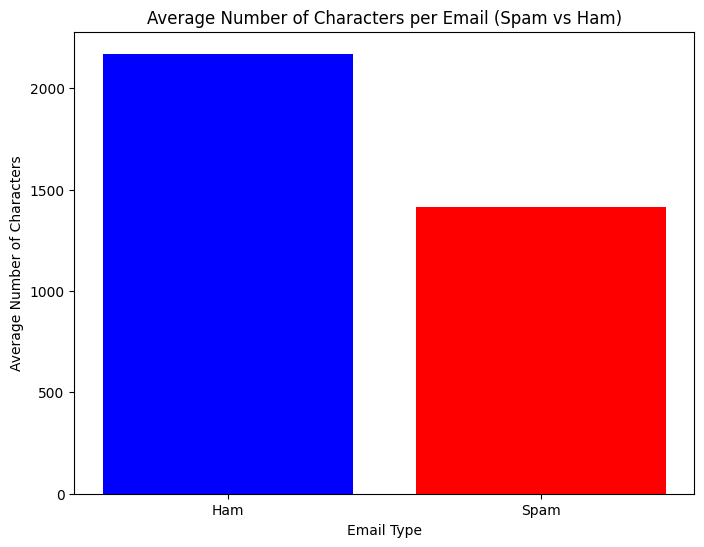

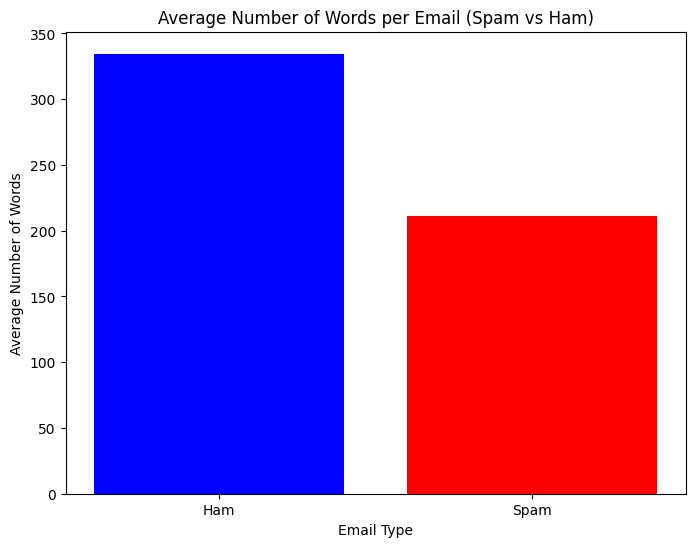

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Add columns for number of characters and words
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(x.split()))

# Group by 'label' (spam/ham) and calculate mean values
summary = df.groupby('label')[['num_characters', 'num_words']].mean()

# Plot for Number of Characters
plt.figure(figsize=(8, 6))
plt.bar(['Ham', 'Spam'], summary['num_characters'], color=['blue', 'red'])
plt.title('Average Number of Characters per Email (Spam vs Ham)')
plt.ylabel('Average Number of Characters')
plt.xlabel('Email Type')
plt.show()

# Plot for Number of Words
plt.figure(figsize=(8, 6))
plt.bar(['Ham', 'Spam'], summary['num_words'], color=['blue', 'red'])
plt.title('Average Number of Words per Email (Spam vs Ham)')
plt.ylabel('Average Number of Words')
plt.xlabel('Email Type')
plt.show()


<Axes: >

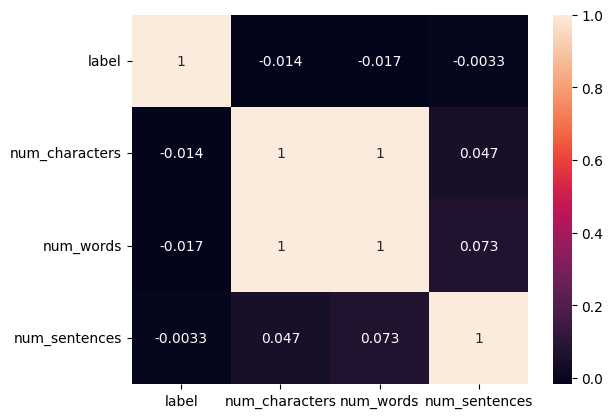

In [ ]:
# Select only numerical features for correlation
numerical_features = df.select_dtypes(include=[np.number]).columns
numerical_df = df[numerical_features]

# Calculate correlation matrix
corr_matrix = numerical_df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True)

Data preprocessing

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

# Ensure stopwords and lemmatizer are downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Data cleaning
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

# Remove stopwords and lemmatize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = nltk.word_tokenize(text)  # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatize and remove stopwords
    return " ".join(tokens)

df['processed_text'] = df['cleaned_text'].apply(preprocess_text)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df.head()

,label,text,num_characters,num_words,num_sentences,cleaned_text,processed_text
0,1,viiiiiiagraaaa\nonly for the ones that want to...,403,60,5,viiiiiiagraaaa\nonly for the ones that want to...,viiiiiiagraaaa one want make scream prodigy sc...
1,0,got ice thought look az original message ice o...,530,60,1,got ice thought look az original message ice o...,got ice thought look az original message ice o...
2,1,yo ur wom an ne eds an escapenumber in ch ma n...,215,48,1,yo ur wom an ne eds an escapenumber in ch ma n...,yo ur wom ne ed escapenumber ch n b e th n f h...
3,1,start increasing your odds of success & live s...,345,69,8,start increasing your odds of success live se...,start increasing odds success live sexually he...
4,0,author jra date escapenumber escapenumber esca...,3097,467,1,author jra date escapenumber escapenumber esca...,author jra date escapenumber escapenumber esca...


In [ ]:
# Vectorize text
vectorizer = TfidfVectorizer(max_features=3000)  # Adjust max_features for dimensionality
X = vectorizer.fit_transform(df['processed_text']).toarray()

In [ ]:
# Model training-ready data
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Train data shape: {X_train.shape}, Test data shape: {X_test.shape}")

Train data shape: (135695, 3000), Test data shape: (58155, 3000)


In [ ]:
df.head()

,label,text,num_characters,num_words,num_sentences,cleaned_text,processed_text
0,1,viiiiiiagraaaa\nonly for the ones that want to...,403,60,5,viiiiiiagraaaa\nonly for the ones that want to...,viiiiiiagraaaa one want make scream prodigy sc...
1,0,got ice thought look az original message ice o...,530,60,1,got ice thought look az original message ice o...,got ice thought look az original message ice o...
2,1,yo ur wom an ne eds an escapenumber in ch ma n...,215,48,1,yo ur wom an ne eds an escapenumber in ch ma n...,yo ur wom ne ed escapenumber ch n b e th n f h...
3,1,start increasing your odds of success & live s...,345,69,8,start increasing your odds of success live se...,start increasing odds success live sexually he...
4,0,author jra date escapenumber escapenumber esca...,3097,467,1,author jra date escapenumber escapenumber esca...,author jra date escapenumber escapenumber esca...


Model Building Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
train_accuracy = lr.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.3f}")

Training Accuracy: 0.971


In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135690,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135691,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135692,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135693,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train

,label
136297,1
142496,1
106461,1
124415,1
82220,0
...,...
119880,0
103695,0
131933,0
146868,1


In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
test_accuracy = lr.score(X_test, y_test)
print(f"Testing Accuracy: {test_accuracy:.3f}")

Testing Accuracy: 0.968


evaluate model

Accuracy= 0.97
[[29500  1066]
 [  807 26782]]
Accuracy: 0.97


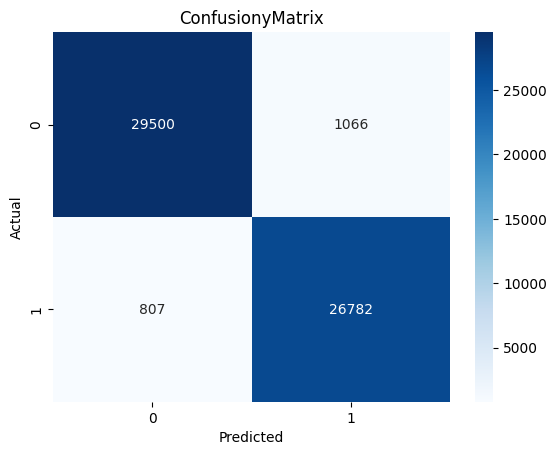

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     30566
           1       0.96      0.97      0.97     27589

    accuracy                           0.97     58155
   macro avg       0.97      0.97      0.97     58155
weighted avg       0.97      0.97      0.97     58155



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy= {accuracy:.2f}")
print(confusion_matrix(y_test, y_pred))


# Calculate accuracy
accuracy = accuracy_score (y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel( 'Actual')
plt.title('ConfusionyMatrix')
plt.show()
# Display classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)


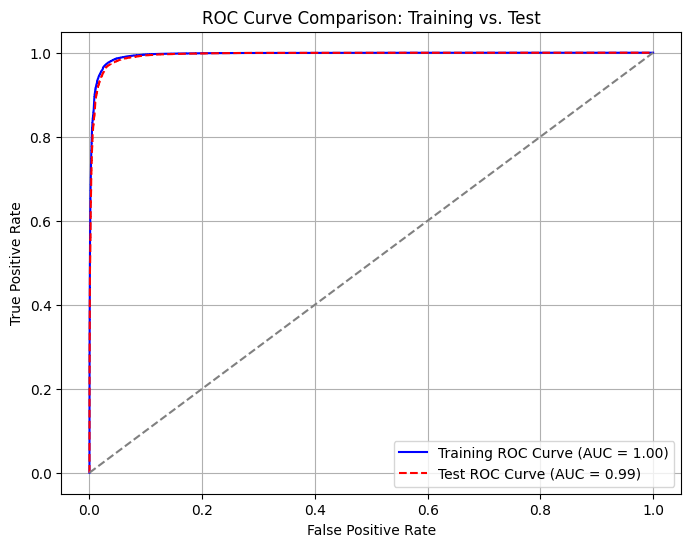

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for training and test datasets
# Use X_train and X_test instead of X_train_tfidf and X_test_tfidf
y_train_proba = lr.predict_proba(X_train)[:, 1]
y_test_proba = lr.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for training
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba) # Use y_train_proba
roc_auc_train = auc(fpr_train, tpr_train)

# Compute ROC curve and AUC for test
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba) # Use y_test_proba
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Training ROC Curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', linestyle='--', label=f'Test ROC Curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Training vs. Test')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
def classify_email(email):
    # Preprocess the email
    cleaned_email = clean_text(email)
    processed_email = preprocess_text(cleaned_email)

    # Vectorize the email using the pre-trained vectorizer
    email_vectorized = vectorizer.transform([processed_email]).toarray()

    # Predict using the pre-trained model
    prediction = lr.predict(email_vectorized)

    # Return the result
    return "Spam" if prediction[0] == 1 else "Not Spam"

# Test the email classification
new_email = "Subject: Meeting Reminder: Project Discussion at 3 PM Body: Hi ali, This is a reminder about our project discussion meeting scheduled for today at 3 PM. Please make sure to bring your latest report. Looking forward to discussing the updates. Best regards, hussain"
result = classify_email(new_email)
print(f"The email is classified as: {result}")

The email is classified as: Not Spam
